In [3]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


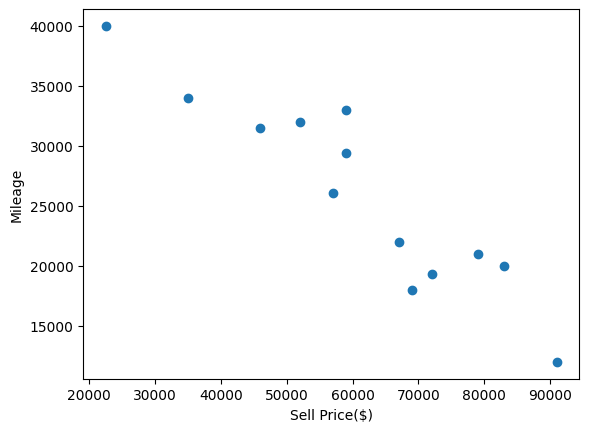

In [4]:
plt.scatter(df['Mileage'], df['Sell Price($)'])
plt.xlabel('Sell Price($)')
plt.ylabel('Mileage')
plt.show()

In [5]:
dummy_values = pd.get_dummies(df['Car Model'])
dummy_values

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [7]:
merged_carprices = pd.concat([df, dummy_values], axis='columns')
merged_carprices

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [8]:
final_carprices = merged_carprices.drop(['Car Model', 'Audi A5'], axis='columns')
final_carprices

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [9]:
x = final_carprices.drop(['Sell Price($)'], axis='columns').values
y = final_carprices['Sell Price($)'].values

model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [10]:
#mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000, 4, 0, 1]])

array([36991.31721061])

In [11]:
#BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000, 7, 1, 0]])

array([11080.74313219])

In [12]:
model.score(x, y)

0.9417050937281082